1. 아직 모르는 물리 공식 써보기 (칼럼 생성)
2. 도비님 & 오버샘플링 사용해서 데이터 증강하기 (데이터 세로로 길어짐)

## 신호벡터크기

에너지로 변환하는 공식: $ SVM = sqrt (x² + y² + z²) $

"Signal Vector Magnitude는 중력에 대한 3축 가속도 신호의 방향 성분을 상쇄하고 신호 벡터의 크기를 얻어내는 방법이다. 이는 스마트폰과 같이 휴대방법에 따라 뒤섞이는 센서의 축 방향 손실과 무관하게 패턴 정보를 획득 가능한 방법 중 하나이다."

푸리에 변환 생략 -> 왜 안 했는지 발표에 추가

In [1]:
import pandas as pd
import numpy as np

In [50]:
train_feature = pd.read_csv('../prj_running_machine/data/train_features.csv')
train_label = pd.read_csv('../prj_running_machine/data/train_labels.csv')
test_feature = pd.read_csv('../prj_running_machine/data/test_features.csv')
sample = pd.read_csv('../prj_running_machine/data/sample_submission.csv')

In [51]:
# 신호벡터크기(에너지값) 칼럼 생성

train_feature['acc_energy'] = \
(train_feature['acc_x']**2 + train_feature['acc_y']**2 + train_feature['acc_z']**2)**(1/3)
test_feature['acc_energy'] = \
(test_feature['acc_x']**2 + test_feature['acc_y']**2 + test_feature['acc_z']**2)**(1/3)

train_feature['gy_energy'] =\
(train_feature['gy_x']**2 + train_feature['gy_y']**2 + train_feature['gy_z']**2)**(1/3)
test_feature['gy_energy'] = \
(test_feature['gy_x']**2 + test_feature['gy_y']**2 + test_feature['gy_z']**2)**(1/3)

In [52]:
train_feature.isnull().sum()

id            0
time          0
acc_x         0
acc_y         0
acc_z         0
gy_x          0
gy_y          0
gy_z          0
acc_energy    0
gy_energy     0
dtype: int64

In [54]:
features = ['id', 'acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z','acc_energy', 'gy_energy']
X_data = train_feature[features].groupby('id').agg(['sum', 'median', 'max', 'min', 'mean'])
X_test = test_feature[features].groupby('id').agg(['sum', 'median', 'max', 'min', 'mean'])

Y_data = train_label['label']

In [56]:
X_columns = [agg + '_' + column for agg,column in X_data.columns]
X_data.columns = X_columns
X_test.columns = X_columns
X_data.head()

,acc_x_sum,acc_x_median,acc_x_max,acc_x_min,acc_x_mean,acc_y_sum,acc_y_median,acc_y_max,acc_y_min,acc_y_mean,...,acc_energy_sum,acc_energy_median,acc_energy_max,acc_energy_min,acc_energy_mean,gy_energy_sum,gy_energy_median,gy_energy_max,gy_energy_min,gy_energy_mean
id,,,,,,,,,,,,,,,,,,,,,
0,558.797337,0.956149,1.344268,0.591940,0.931329,-131.082711,-0.240638,0.176871,-0.624113,-0.218471,...,619.171101,1.034998,1.289737,0.788600,1.031952,5815.160027,9.108923,20.995703,1.575952,9.691933
1,-459.948117,-0.805767,1.234020,-2.156208,-0.766580,-190.354639,-0.228905,0.700065,-1.295598,-0.317258,...,632.688598,1.034041,1.689572,0.414973,1.054481,12858.851545,19.467856,66.002318,0.995931,21.431419
2,23.901616,0.140667,1.219836,-1.142847,0.039836,-49.441742,-0.062598,0.650645,-0.690990,-0.082403,...,593.195479,0.990897,1.225343,0.667445,0.988659,12864.850286,22.593837,45.189107,3.887709,21.441417
3,-532.621192,-0.880343,-0.622250,-1.417751,-0.887702,-52.600737,-0.054577,0.283721,-0.540827,-0.087668,...,585.741919,0.964337,1.275964,0.794752,0.976237,7807.353545,12.071106,38.734831,1.983493,13.012256
4,-395.410844,-0.941146,0.599720,-2.429109,-0.659018,-202.240064,-0.168467,1.724782,-2.055076,-0.337067,...,637.338408,1.010600,2.102402,0.499585,1.062231,8067.185605,7.648981,87.700004,0.489001,13.445309


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(train_feature)
train_feature = scaler.fit_transform(train_feature)

# SMOTE (불균형 데이터)

In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

print(X_data.shape)
print(y_data.shape)
feature_over, label_over = smote.fit_resample(X_data, y_data)

(3125, 40)
(3125,)


In [65]:
print(feature_over.shape)
print(label_over.shape)

(92598, 40)
(92598,)


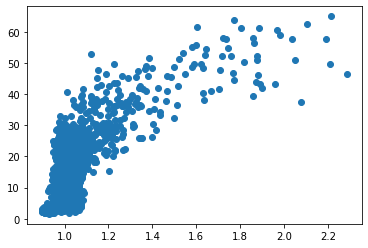

In [75]:
import matplotlib.pyplot as plt

plt.scatter(X_data['acc_energy_mean'],X_data['gy_energy_mean'],cmap='Greens')
plt.show()

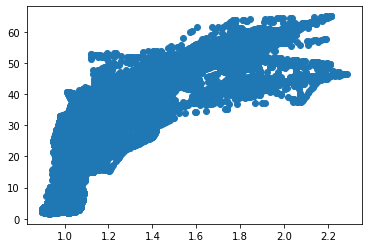

In [76]:
plt.scatter(feature_over['acc_energy_mean'], feature_over['gy_energy_mean'],cmap='Greens')
plt.show()

NaN 제거한 후에 SMOTE 성공

x_train = []

for uid in train_feature['id'].unique():
    temp = np.array(train_feature[train_feature['id'] == uid].iloc[:,2:], np.float32).T
    x_train.append(temp)

x_train = np.array(x_train, np.float32)
x_train = x_train[:,:,:,np.newaxis]

x_test = []

for uid in test_feature['id'].unique():
    temp = np.array(test_feature[test_feature['id'] == uid].iloc[:,2:], np.float32).T
    x_test.append(temp)

x_test = np.array(x_test, np.float32)
x_test = x_test[:,:,:,np.newaxis]

print(train_feature.shape)
print(x_train.shape)
x_train = x_train.reshape(-1, 9)
x_train

df = pd.DataFrame(x_train, columns=['acc_x','acc_y','acc_z','gy_x','gy_y','gy_z','gy_acc_energy','acc_energy','gy_energy'])
df

In [62]:
import xgboost as xgb
from xgboost import XGBClassifier

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_over, label_over, test_size=0.2, random_state=26, stratify=label_over)

In [77]:
%%time

xgb_clf = XGBClassifier(random_state = 26,
                          learning_rate = 0.1,
                          n_estimators = 300,
                          max_depth = 6,
                          min_child_weight = 3,
                          gamma = 0.4,
                          subsample = 0.7,
                          min_child_samples=100,
                          colsample_bytree = 0.6)

evals = [(X_test, y_test)]
xgb_clf.fit(X_train, y_train, eval_set=evals, eval_metric='mlogloss', early_stopping_rounds=100, verbose=True)

[0]	validation_0-mlogloss:2.38278
Will train until validation_0-mlogloss hasn't improved in 100 rounds.
[1]	validation_0-mlogloss:2.02326
[2]	validation_0-mlogloss:1.77522
[3]	validation_0-mlogloss:1.57953
[4]	validation_0-mlogloss:1.41658
[5]	validation_0-mlogloss:1.28261
[6]	validation_0-mlogloss:1.16892
[7]	validation_0-mlogloss:1.06873
[8]	validation_0-mlogloss:0.980538
[9]	validation_0-mlogloss:0.901331
[10]	validation_0-mlogloss:0.83045
[11]	validation_0-mlogloss:0.766868
[12]	validation_0-mlogloss:0.709938
[13]	validation_0-mlogloss:0.658138
[14]	validation_0-mlogloss:0.61104
[15]	validation_0-mlogloss:0.567812
[16]	validation_0-mlogloss:0.528704
[17]	validation_0-mlogloss:0.492671
[18]	validation_0-mlogloss:0.459355
[19]	validation_0-mlogloss:0.429018
[20]	validation_0-mlogloss:0.401002
[21]	validation_0-mlogloss:0.375444
[22]	validation_0-mlogloss:0.351789
[23]	validation_0-mlogloss:0.329732
[24]	validation_0-mlogloss:0.309313
[25]	validation_0-mlogloss:0.290335
[26]	validatio

[224]	validation_0-mlogloss:0.018269
[225]	validation_0-mlogloss:0.01826
[226]	validation_0-mlogloss:0.01825
[227]	validation_0-mlogloss:0.018242
[228]	validation_0-mlogloss:0.018234
[229]	validation_0-mlogloss:0.018228
[230]	validation_0-mlogloss:0.018221
[231]	validation_0-mlogloss:0.018214
[232]	validation_0-mlogloss:0.018196
[233]	validation_0-mlogloss:0.018185
[234]	validation_0-mlogloss:0.018177
[235]	validation_0-mlogloss:0.018165
[236]	validation_0-mlogloss:0.018151
[237]	validation_0-mlogloss:0.018147
[238]	validation_0-mlogloss:0.018135
[239]	validation_0-mlogloss:0.018126
[240]	validation_0-mlogloss:0.018119
[241]	validation_0-mlogloss:0.018107
[242]	validation_0-mlogloss:0.018094
[243]	validation_0-mlogloss:0.018084
[244]	validation_0-mlogloss:0.018077
[245]	validation_0-mlogloss:0.01807
[246]	validation_0-mlogloss:0.018063
[247]	validation_0-mlogloss:0.018057
[248]	validation_0-mlogloss:0.018047
[249]	validation_0-mlogloss:0.018041
[250]	validation_0-mlogloss:0.018036
[251

XGBClassifier(colsample_bytree=0.6, gamma=0.4, max_depth=6,
              min_child_samples=100, min_child_weight=3, n_estimators=300,
              objective='multi:softprob', random_state=26, subsample=0.7)

In [80]:
from sklearn.metrics import accuracy_score

xgb_pred = xgb_clf.predict(X_test)
# xgb_pred_proba = xgb_clf.predict_proba(Y_test)[:, 1]
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f'XGBM 정확도 : {xgb_accuracy:.4f}')

XGBM 정확도 : 0.9968


# 대회 자료

In [81]:
test_feature = pd.read_csv('../prj_running_machine/data/test_features.csv')
sample = pd.read_csv('../prj_running_machine/data/sample_submission.csv')

In [82]:
test_feature['acc_energy'] = \
(test_feature['acc_x']**2 + test_feature['acc_y']**2 + test_feature['acc_z']**2)**(1/3)

test_feature['gy_energy'] = \
(test_feature['gy_x']**2 + test_feature['gy_y']**2 + test_feature['gy_z']**2)**(1/3)

features = ['id', 'acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z','acc_energy', 'gy_energy']

test_feature = test_feature[features].groupby('id').agg(['sum', 'median', 'max', 'min', 'mean'])

In [84]:
X_columns = [agg + '_' + column for agg,column in test_feature.columns]

test_feature.columns = X_columns
test_feature

,acc_x_sum,acc_x_median,acc_x_max,acc_x_min,acc_x_mean,acc_y_sum,acc_y_median,acc_y_max,acc_y_min,acc_y_mean,...,acc_energy_sum,acc_energy_median,acc_energy_max,acc_energy_min,acc_energy_mean,gy_energy_sum,gy_energy_median,gy_energy_max,gy_energy_min,gy_energy_mean
id,,,,,,,,,,,,,,,,,,,,,
3125,-611.238360,-1.064222,-0.275446,-1.564000,-1.018731,-11.744605,-0.005735,0.228040,-0.470937,-0.019574,...,623.405646,1.065537,1.378591,0.539978,1.039009,5624.847687,8.889815,23.367908,1.244475,9.374746
3126,-313.705824,-0.677411,0.627571,-1.929033,-0.522843,367.296809,0.606215,1.708743,-0.200678,0.612161,...,630.638167,1.045534,1.563035,0.740214,1.051064,10500.269065,16.569769,43.721859,2.388239,17.500448
3127,304.167948,0.497370,2.972063,-0.792916,0.506947,542.291164,0.931239,1.941820,0.219008,0.903819,...,626.194467,1.053943,2.333286,0.550409,1.043657,5150.009871,7.904912,37.430893,2.218845,8.583350
3128,-346.561617,-0.880541,0.337281,-1.045889,-0.577603,-366.333946,-0.507927,-0.258476,-1.294482,-0.610557,...,609.488164,1.016752,1.207614,0.839241,1.015814,6560.781531,7.061369,41.549524,1.104305,10.934636
3129,-443.184021,-0.703842,0.015642,-2.153047,-0.738640,109.521180,0.122280,1.562602,-0.860883,0.182535,...,588.851915,0.961275,1.709360,0.647509,0.981420,11384.675827,17.541453,56.321587,0.883646,18.974460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,-544.379649,-0.973938,0.427159,-2.050254,-0.907299,292.958363,0.445913,3.057501,-1.414874,0.488264,...,660.405225,1.067743,2.383042,0.806388,1.100675,14274.116844,19.982217,83.708574,5.085688,23.790195
3903,-365.238633,-0.812788,1.659451,-1.709527,-0.608731,222.761433,0.333884,1.549890,-1.247963,0.371269,...,622.311718,1.022290,1.699846,0.479578,1.037186,13608.800709,22.423611,59.190002,4.568166,22.681335
3904,-451.915502,-0.809029,-0.085249,-2.124959,-0.753193,119.869170,0.097582,1.236138,-0.443533,0.199782,...,580.317685,0.957284,1.733199,0.709185,0.967196,7994.891152,11.830425,40.753868,0.891504,13.324819


In [85]:
sample

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
pred_final = xgb_clf.predict_proba(test_feature)
sample.iloc[:, 1:] = pred_final

In [90]:
pred_final.argmax(axis=1)

array([11, 26,  1, 49, 26,  1, 26, 16,  8, 47, 26, 28, 43, 60, 26, 26, 18,
       26,  8, 26, 55, 26, 17, 30, 49, 26, 51, 26, 26, 26, 26, 48, 28, 50,
       18, 26, 29, 13, 26, 26, 23, 26, 26, 34, 26, 26, 38, 26, 56, 49, 28,
       26, 26, 48, 47, 26, 26, 26, 26, 26, 26, 25, 42, 26, 34,  8, 60, 51,
       56, 26, 26, 60, 26, 26, 26, 15,  7, 14, 14, 44, 26, 43, 49, 26,  8,
       59, 24, 26, 26, 26, 29, 46, 34, 26, 34, 43,  1,  9, 26, 50,  7, 60,
       26, 55, 18,  8, 52, 35, 26, 58, 60, 27, 25, 26, 26, 55, 26, 26, 26,
       43, 26, 50, 34, 48, 30,  8, 36,  8, 42,  8, 26, 14, 26, 51, 26, 13,
       26, 27, 39, 30, 56, 30, 11, 32,  8, 26, 26,  1, 19, 26, 26,  8, 26,
       60, 26, 26, 26, 26, 26,  8, 26, 49, 58, 26, 34, 23, 50, 58, 21, 26,
       26, 18, 26, 54, 26, 15, 35, 26, 26,  5, 26, 26, 26, 27, 55, 26, 26,
       26, 26, 40, 35, 20, 50, 46, 26, 26, 28, 60, 20, 26,  8, 18, 15, 26,
       26, 26, 26, 25, 43,  7, 16, 12, 26, 26, 26, 26, 26, 26, 26, 20, 29,
       26,  5, 44,  4, 26

In [89]:
sample

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0.000849,0.001114,0.000986,0.000996,0.002493,0.000844,0.001645,0.001915,0.000919,...,0.038219,0.001491,0.004396,0.001645,0.001108,0.001393,0.001071,0.003741,0.001128,0.002186
1,3126,0.000044,0.000009,0.000007,0.000030,0.000017,0.000011,0.000013,0.000045,0.000014,...,0.000030,0.000008,0.000009,0.000008,0.000008,0.000015,0.000023,0.000010,0.000009,0.000020
2,3127,0.003956,0.451595,0.001549,0.004207,0.003859,0.002227,0.005508,0.003513,0.002793,...,0.002416,0.001844,0.002960,0.004937,0.002314,0.022926,0.001660,0.001671,0.031851,0.083333
3,3128,0.002382,0.000289,0.000520,0.000205,0.000248,0.000245,0.000267,0.000395,0.000311,...,0.000227,0.000238,0.000293,0.000346,0.000313,0.000202,0.001017,0.000248,0.000236,0.005421
4,3129,0.003943,0.000102,0.000217,0.000224,0.000181,0.000308,0.000100,0.000291,0.000625,...,0.000146,0.000095,0.000161,0.000094,0.000122,0.000105,0.000208,0.000114,0.000096,0.000139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.002203,0.000814,0.000708,0.000808,0.093869,0.011380,0.000902,0.000968,0.000685,...,0.003943,0.000639,0.007904,0.000742,0.001025,0.001378,0.003517,0.000898,0.000833,0.000851
778,3903,0.000565,0.000121,0.000090,0.000202,0.000157,0.002280,0.000107,0.000102,0.000125,...,0.000162,0.000077,0.000223,0.000089,0.000214,0.000215,0.000295,0.000087,0.000078,0.000083
779,3904,0.000069,0.000034,0.000050,0.000031,0.000049,0.000042,0.000030,0.000063,0.000797,...,0.000039,0.000029,0.000040,0.000026,0.000039,0.000029,0.000141,0.000027,0.000029,0.000285
780,3905,0.000005,0.000013,0.000005,0.000004,0.000003,0.000003,0.000071,0.000009,0.000003,...,0.000005,0.000003,0.000007,0.000051,0.000004,0.000008,0.000007,0.000004,0.000006,0.000002


In [91]:
sample.to_csv('./final.csv', index = False)